<div style ="text-align:corner;font-size:23px;color:purple">**Name:Jayasurya V**</div><br>
<div style ="text-align:corner;font-size:23px;color:Blue">**Level-1 Exam for Data Analysis Using Python**</div>

### Import Libraries

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
import plotly.express as px

### Load excel dataset

In [46]:
df=pd.read_excel('G:\job.xlsx')

In [47]:
df.head()

,Segment,Country,Product,Discount Band,Date,Units Sold,Manufacturing Price,SalePrice,Gross Sales
0,Small Business,United States of America,Montana,Low,2013-09-01,2498.0,5,300,749400.0
1,Government,Germany,Montana,Low,2013-09-01,1797.0,5,350,628950.0
2,Government,France,VTT,None,2013-09-01,1527.0,250,350,534450.0
3,Small Business,Canada,Montana,Medium,2013-09-01,1283.0,5,300,384900.0
4,Small Business,Germany,Paseo,Medium,2013-09-01,1123.0,10,300,336900.0


In [48]:
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Date', 'Units Sold',
       'Manufacturing Price', 'SalePrice', 'Gross Sales'],
      dtype='object')

### Calculate Profit and Loss 

In [51]:
df["Total Price"] = df["Manufacturing Price"] - df["SalePrice"]

### 1.Generate Country wise profit/loss statement using appropriate tools and present in the most suitable chart?

In [104]:

G=df.groupby(['Country'],as_index=False)['Total Price'].sum()
G

,Country,Total Price
0,Canada,-3430
1,France,-3206
2,Germany,-3210
3,Mexico,-3186
4,United States of America,-2334


In [105]:
G.iplot(x='Country',y='Total Price',kind='barh',theme='solar',title='Country wise sales profit and Loss')

### Product and Country Wise Profit loss

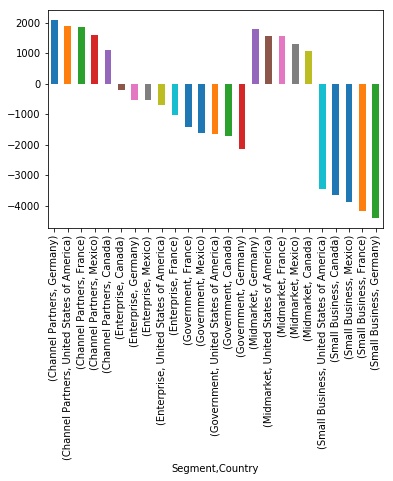

In [52]:

group = df.groupby(["Segment","Country"]).sum()
total_price = group["Total Price"].groupby(level=0, group_keys=False)

gtp = total_price.nlargest(5)
ax = gtp.plot(kind="bar")

### 2. Using the Pie/bar chart, present the country wise sales value and net sales value?

In [67]:
Gr1=df.groupby(['Country'],as_index=False)['SalePrice'].sum()
Gr1

,Country,SalePrice
0,Canada,16580
1,France,16580
2,Germany,16580
3,Mexico,16580
4,United States of America,16580


#### Sales Value in Country wise

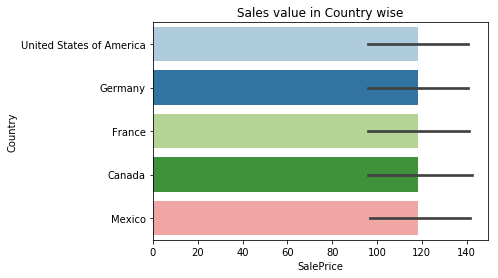

In [61]:
plt.title("Sales value in Country wise")
sns.barplot(x="SalePrice", y="Country", data=df, palette='Paired');

#### Net Value In Country Wise

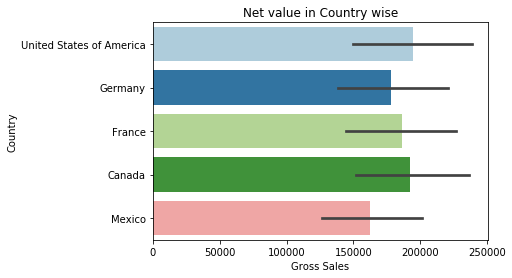

In [62]:
plt.title("Net value in Country wise")
sns.barplot(x="Gross Sales", y="Country", data=df, palette='Paired');

#### Both Sales Value and Net Value

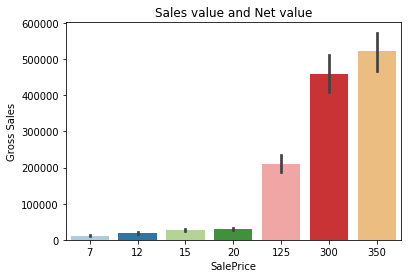

In [60]:
plt.title("Sales value and Net value")
sns.barplot(x="SalePrice", y="Gross Sales", data=df, palette='Paired');


### 3. Present the product wise sales and find out the  profit/loss  value for each product, and  show them on a  line chart?

### Product Wise sales

In [107]:
Gr=df.groupby(['Product'],as_index=False)['SalePrice'].sum()
Gr

,Product,SalePrice
0,Amarilla,12096
1,Carretera,10395
2,Montana,10890
3,Paseo,21852
4,VTT,15106
5,Velo,12561


In [109]:
Gr.iplot(kind='line',x='Product',y='SalePrice',title='Product wise Sale Price',color='Green')

### Find Total Price(Profit and Loss)

In [110]:

Gr1=df.groupby(['Product'],as_index=False)['Total Price'].sum()
Gr1

,Product,Total Price
0,Amarilla,12344
1,Carretera,-10116
2,Montana,-10425
3,Paseo,-19832
4,VTT,12144
5,Velo,519


In [137]:
Gr1.iplot(x='Product',y='Total Price',kind='barh',theme='solar',title='Product wise sales profit and Loss')

In [112]:
Gr1.iplot(x='Product',y='Total Price',kind='line',theme='solar')

## Product Wise Profit and Loss Report

<li>**Carretera** got 10116k Loss
<li>**Montana** got 10425k Loss
<li>**Paseo** got 19832k Loss
<li>**VTT** got 12144K profit
<li>**Velo** got 519k Profit
<li>**Amarilla** got 12344k Profit

### 4.Using the easiest method, present the Segment wise sales value with a chart of your choice(most suitable chart for clear understanding will score more marks)?

In [113]:
Gr3=df.groupby(['Segment'],as_index=False)['SalePrice'].sum()
Gr3

,Segment,SalePrice
0,Channel Partners,1200
1,Enterprise,12500
2,Government,37700
3,Midmarket,1500
4,Small Business,30000


#### Segment wise Sales Price

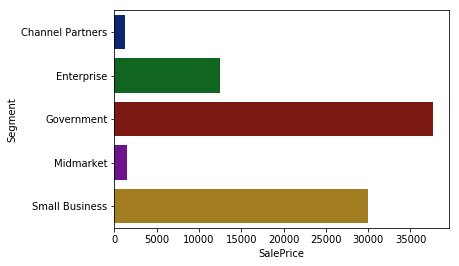

In [125]:
sns.barplot(y='Segment', x='SalePrice', data=Gr3, palette='dark');

## Segment wise Sales Price Report

<li>**Small Business** got 30 thoushand sales
<li>**Channel Partners** got 1.2 thoushand Sales
<li>**Midmarket** got  1.5 thoushand Sales
<li>**Enterprise** got 12.5 thoushand Sales
<li>**Government** got 37.7 thoushand Sales

### 5. Using the easiest method, present the segment wise profit/loss statement with a chart of your choice(most suitable chart for clear understanding will score more marks) ?

In [126]:

Gr4=df.groupby(['Segment'],as_index=False)['Total Price'].sum()
Gr4

,Segment,Total Price
0,Channel Partners,8514
1,Enterprise,-2995
2,Government,-8562
3,Midmarket,7256
4,Small Business,-19579


### Segment Wise Profit and Loss

In [134]:
fig = px.bar(Gr4, x='Segment', y='Total Price', text='Total Price')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',bargap=0.7,title='Segment wise Profit and Loss')
fig.show()

## Segment wise Profit loss report

<li>**Small Business** got loss 20 thoushand
<li>**Channel Partners** got profit 8.5 thoushand
<li>**Midmarket** got profit 73 thoushand
<li>**Enterprise** got loss 3 thoushand
<li>**Government** got loss 8.6 thoushand